# Drug Classification Using Unsupervised Learning

In this project we use data collected from a drug company about the drugs and the parameters that effect it. The drug is recommended based on the disease and the type of patient. Each patient gets one of the drug from the 5 types of drugs based on Age, Sex, Blood Pressure, Cholesterol and Na-to-K ratio.

We need to build a model to find out which drug might be appropriate for a future patient with the same illness. 
The feature sets of this dataset are Age, Sex, Blood Pressure, Cholesterol and Na-to-K ratio of patients, and the target is the drug that each patient responded to.
Data Source: https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data

In this project we will try to recommend drugs to patients using unsupervised learning model.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

First, we will read the data to the pandas dataframe.

In [2]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

We will see the first 5 rows of the dataframe.

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**Exploratory Data Analysis (EDA)**

Now we will try to see the datatypes of the features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We see that we have two numerical features 'Age' and 'Na_to_K' and three categorical variables 'Sex', 'BP', and 'Cholesterol'. 'Drug' is the target variable, if we want to do supervised learning. Also, there are no missing values.

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

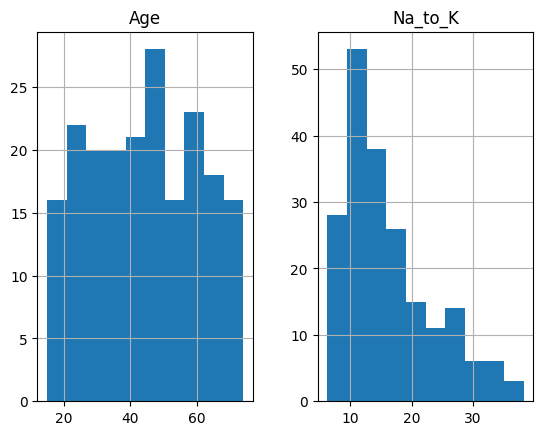

In [6]:
df.hist()

<Axes: >

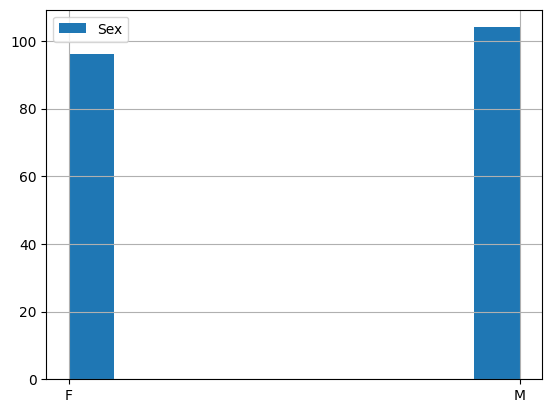

In [7]:
df["Sex"].hist(legend='True')

<Axes: >

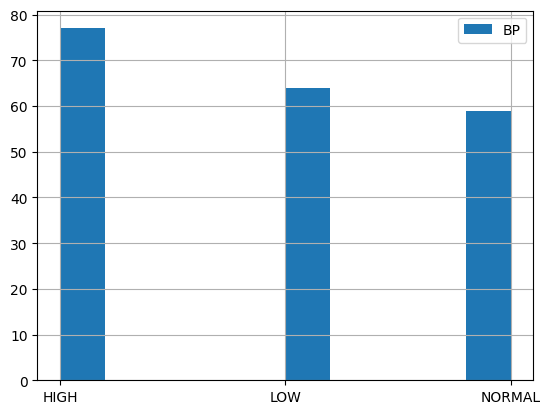

In [8]:
df["BP"].hist(legend='True')

<Axes: >

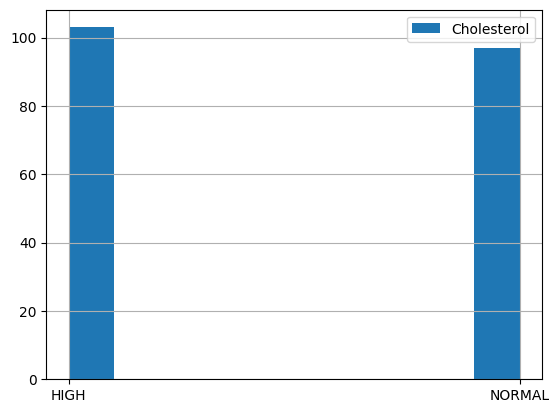

In [9]:
df["Cholesterol"].hist(legend='True')

From the histograms above for features we see that all the features look correct.

We will drop the 'Drug' feature from the dataframe since we would be doing unsupervised learning. We would be storing it as y so that we can compare it with our predicted value later. Since y has labels we encode it using LabelEncoder.

In [10]:
y = df["Drug"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
df = df.drop(["Drug"], axis=1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


Now we will encode categorical features values as:
* Sex(1=F,0=M)
* Cholesterol('HIGH'=1,'NORMAL'=0)
* BP('HIGH'=1,'NORMAL'=0.5,'LOW'=0)

In [12]:
df["Sex"] = np.where(df["Sex"] == "F", 1, 0)
df["Cholesterol"]=np.where(df["Cholesterol"] == "HIGH",1,0)
df["BP"]=np.where(df["BP"] == "HIGH",1,np.where(df["BP"] == "NORMAL",0.5,0))
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1.0,1,25.355
1,47,0,0.0,1,13.093
2,47,0,0.0,1,10.114
3,28,1,0.5,1,7.798
4,61,1,0.0,1,18.043


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    float64
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


Since, 'Age', 'Sex' and 'Cholesterol' are categorical features we will convert them to categorical.

In [14]:
df['Sex']=df['Sex'].astype('category')
df['BP']=df['BP'].astype('category')
df['Cholesterol']=df['Cholesterol'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    category
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 4.2 KB


Now we will standardise the data using the StandardScaler function from Sklearn. 

In [16]:
scaler = StandardScaler()
df[['Age','Na_to_K']]=scaler.fit_transform(df[['Age','Na_to_K']])
df

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,1,1.0,1,1.286522
1,0.162699,0,0.0,1,-0.415145
2,0.162699,0,0.0,1,-0.828558
3,-0.988614,1,0.5,1,-1.149963
4,1.011034,1,0.0,1,0.271794
...,...,...,...,...,...
195,0.708057,1,0.0,1,-0.626917
196,-1.715759,0,0.0,1,-0.565995
197,0.465676,0,0.5,1,-0.859089
198,-1.291591,0,0.5,0,-0.286500


Now let us check if there is any correlation between the features.

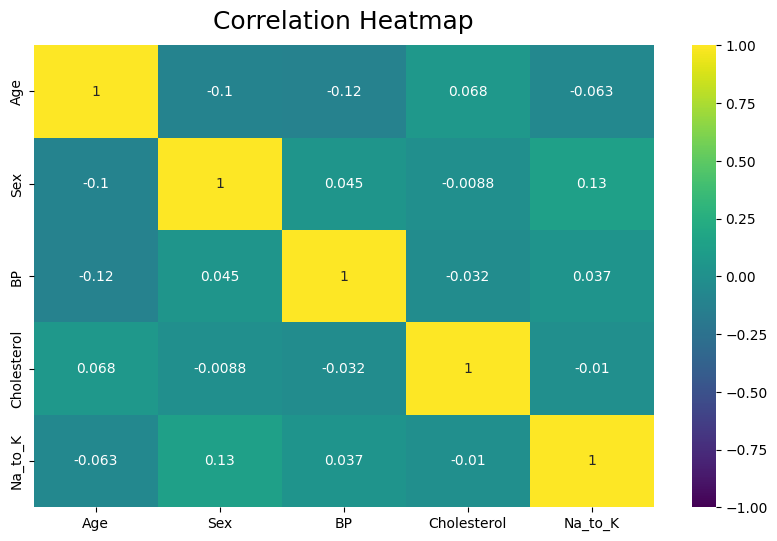

In [17]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

From the correlation table we see that none of the features are highly correlated. So, we will consider all the features.

**Model**

We will use KMeans clustering algorithm to partition our data with 200 observations into 5 clusters. We need to identify the correct group of drug each patient should belong to.

In [18]:
# Generate blobs for clustering
df,y = make_blobs(n_samples=200,centers=5,random_state=10,n_features=5)

In [19]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5,random_state=10)
k_means.fit(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=10)

In [20]:
cluster_centers = k_means.cluster_centers_
cluster_labels = k_means.labels_

We can see the labels of the predictions by using inverse_transform function from label_encoder.

In [21]:
pred_labels = label_encoder.inverse_transform(cluster_labels)
# pred_labels

Unlike supervised learning we cannot directly compute the accuracy for unsupervised learning. So we will use clustering evaluation metrics to compare the clustering results to the true labels. We will use Adjusted Rand Index(ARI) clustering evaluation metrics here. ARI ranges from -1 to 1. Score close to 1 indicates perfect similarity between predicted and true cluster, and score close to -1 indicates perfectly mismatched clustering.

In [22]:
ari = adjusted_rand_score(y,cluster_labels)
ari

1.0

We see that in this case the ARI is 1. So, there is perfectly matched clustering in this case.

Now, let us visualise our clusters. Since we have 5 features we will visualise two features per scatter plot.

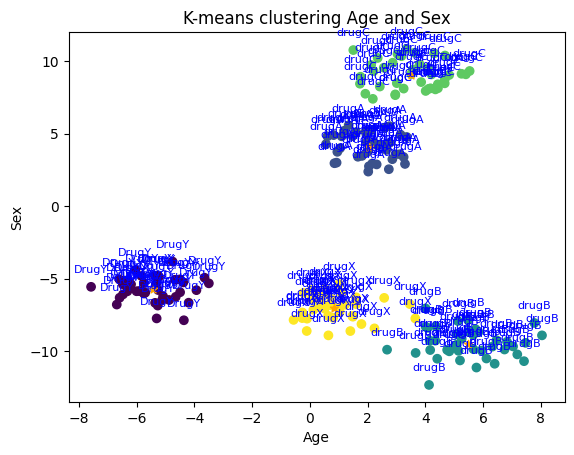

In [23]:
plt.scatter(df[:,0],df[:,1],c=cluster_labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='*',c='orange')
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title('K-means clustering Age and Sex')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,0],df[i,1]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()

For older males drugB is predicted. For younger males drugY is predicted. For older females drugC is predicted.

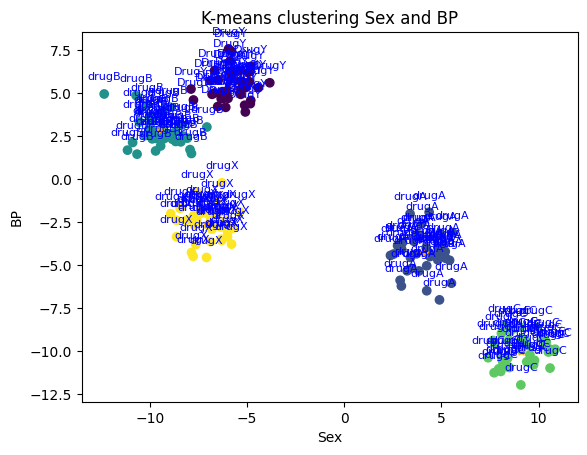

In [24]:
plt.scatter(df[:,1],df[:,2],c=cluster_labels)
plt.scatter(cluster_centers[:,1],cluster_centers[:,2],marker='*',c='orange')
plt.xlabel("Sex")
plt.ylabel("BP")
plt.title('K-means clustering Sex and BP')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,1],df[i,2]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')

plt.show()

For females with low BP drugC is predicted. For males with high BP drugY is predicted.

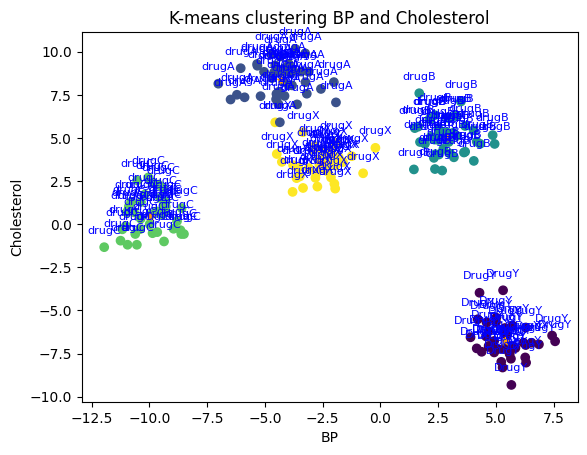

In [25]:
plt.scatter(df[:,2],df[:,3],c=cluster_labels)
plt.scatter(cluster_centers[:,2],cluster_centers[:,3],marker='*',c='orange')
plt.xlabel("BP")
plt.ylabel("Cholesterol")
plt.title('K-means clustering BP and Cholesterol')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,2],df[i,3]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()

For patients with high BP and low Cholesterol drugY is predicted. For patients with high Cholesterol and normal BP drugA is predicted.

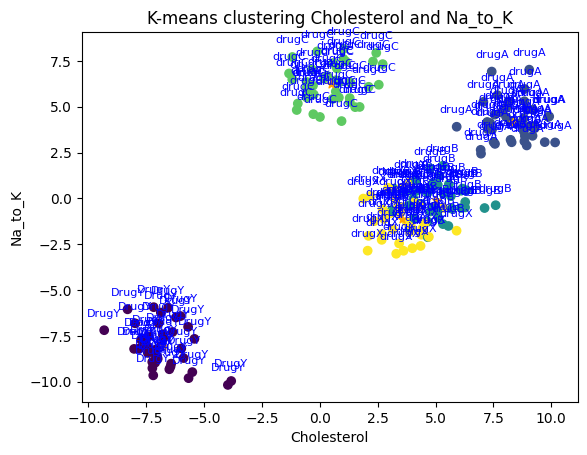

In [26]:
plt.scatter(df[:,3],df[:,4],c=cluster_labels)
plt.scatter(cluster_centers[:,3],cluster_centers[:,4],marker='*',c='orange')
plt.xlabel("Cholesterol")
plt.ylabel("Na_to_K")
plt.title('K-means clustering Cholesterol and Na_to_K')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,3],df[i,4]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')

plt.show()

For patients with high Cholesterol and high Na_to_K ratio drugA is predicted. For patients with low Cholesterol and low Na_to_K ratio DrugY is predicted.

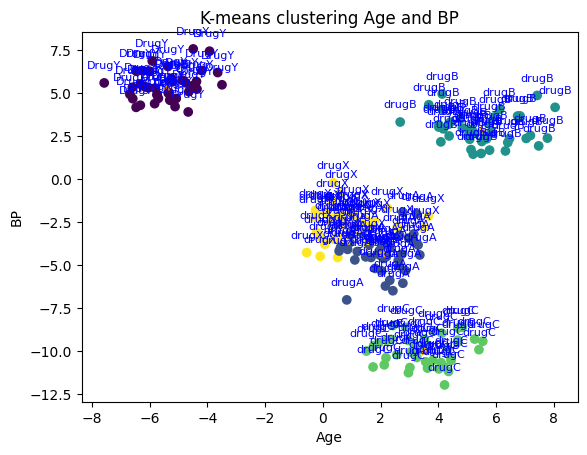

In [27]:
plt.scatter(df[:,0],df[:,2],c=cluster_labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,2],marker='*',c='orange')
plt.xlabel("Age")
plt.ylabel("BP")
plt.title('K-means clustering Age and BP')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,0],df[i,2]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()

For younger patients with high BP DrugY is predicted. For older patients with high BP drugB is predicted.

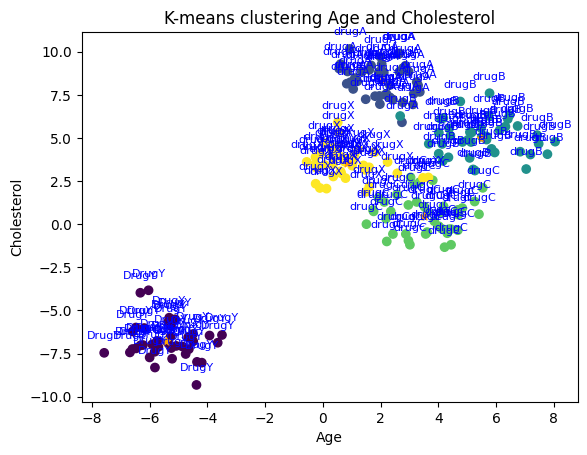

In [28]:
plt.scatter(df[:,0],df[:,3],c=cluster_labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,3],marker='*',c='orange')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title('K-means clustering Age and Cholesterol')   
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,0],df[i,3]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()

For younger patients with low Cholesterol DrugY is predicted. For older patients with high Cholesterol drugB is predicted.

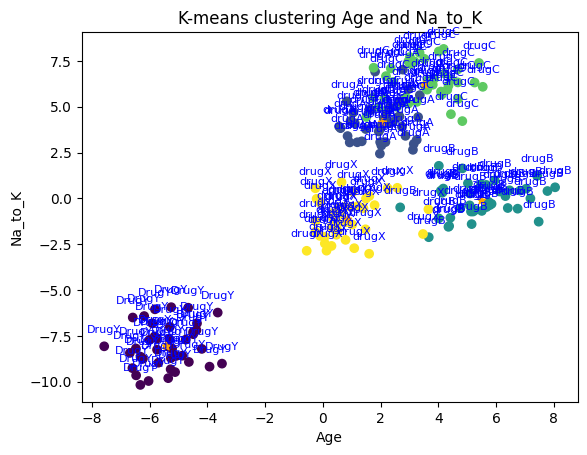

In [29]:
plt.scatter(df[:,0],df[:,4],c=cluster_labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,4],marker='*',c='orange')
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.title('K-means clustering Age and Na_to_K')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,0],df[i,4]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()


For younger patients with low Na_to_K ratio DrugY is predicted. For older patients with greater Na_to_K ratio drugC is predicted.

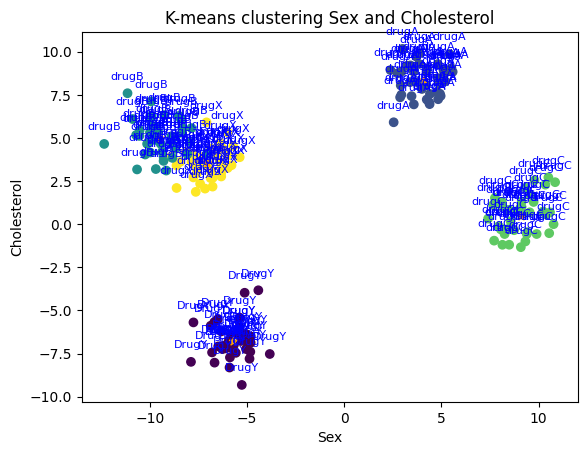

In [30]:
plt.scatter(df[:,1],df[:,3],c=cluster_labels)
plt.scatter(cluster_centers[:,1],cluster_centers[:,3],marker='*',c='orange')
plt.xlabel("Sex")
plt.ylabel("Cholesterol")
plt.title('K-means clustering Sex and Cholesterol')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,1],df[i,3]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')

plt.show()

For male patients with high Cholesterol drugB is predicted. For female patients with high Cholesterol drugA is predicted.

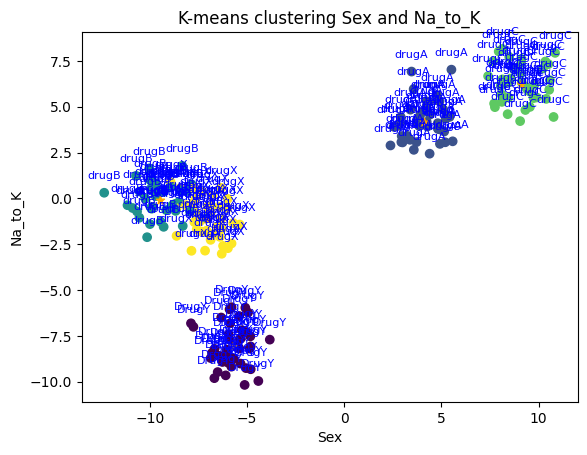

In [31]:
plt.scatter(df[:,1],df[:,4],c=cluster_labels)
plt.scatter(cluster_centers[:,1],cluster_centers[:,4],marker='*',c='orange')
plt.xlabel("Sex")
plt.ylabel("Na_to_K")
plt.title('K-means clustering Sex and Na_to_K')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,1],df[i,4]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')

plt.show()

For male patients with low Na_to_K ratio DrugY is predicted. For female patients with high Na_to_K ratio drugC is predicted.

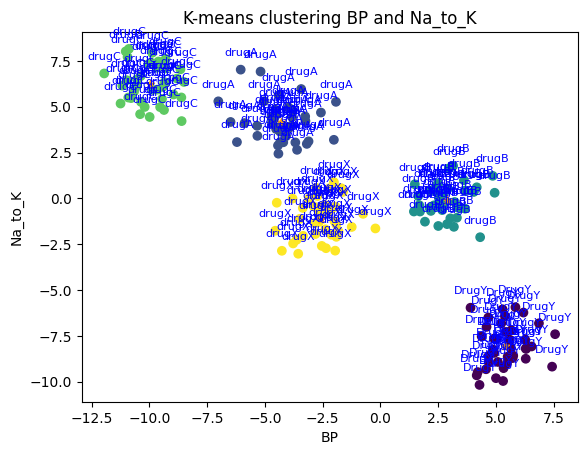

In [32]:
plt.scatter(df[:,2],df[:,4],c=cluster_labels)
plt.scatter(cluster_centers[:,2],cluster_centers[:,4],marker='*',c='orange')
plt.xlabel("BP")
plt.ylabel("Na_to_K")
plt.title('K-means clustering BP and Na_to_K')
for i, txt in enumerate(pred_labels):
    plt.annotate(txt,(df[i,2],df[i,4]),textcoords="offset points",xytext=(0,10),ha='center',fontsize=8,color='blue')
plt.show()

For patients with low Na_to_K ratio and high BP DrugY is predicted. For patients with high Na_to_K ratio and low BP drugC is predicted.

From the above plots we see that using KMeans algorithm we are able to cluster the data into 5 clusters corresponding to DrugY, drugX, drugA, drugB and drugC. Looking at the plots we can figure out which drug needs to be used on patients based on different features like Age, Sex, BP, Cholesterol and Na to K.